---
Some useful $\LaTeX$ commands are defined in this cell:
$$
\newcommand{\abs}[1]{\left\lvert#1\right\rvert}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\set}[1]{\left\{#1\right\}}
\newcommand{\paren}[1]{\left(#1\right)}
\newcommand{\brack}[1]{\left[#1\right]}
\newcommand{\ip}[2]{\left\langle#1,#2\right\rangle}
\DeclareMathOperator{\span}{span}
\DeclareMathOperator{\fl}{fl}
\abs{x}, \norm{x}, \set{x}, \paren{x}, \brack{x}, \ip{x}{y}, \span, \fl
$$

---

---
# 16.6 Error control and estimation
---

In this last section, we consider adaptively changing the step size in order to obtain a method that:

- is accurate to within a user specified tolerance `tol`;
- uses a small number of step points $N$.

Like the **adaptive quadrature** method, the idea is to use smaller steps $h_i$ where the solution is varying rapidly, and larger steps where the solution is changing slowly.

However, unlike the **adaptive quadrature** method, bounding the total error is difficult and we will instead bound a measure of the local error.

## Global error

Given an approximation 

$$y_i \approx y(t_i), \quad i = 0, 1, \ldots, N,$$

where $y(t)$ is the exact solution of the ODE

$$y' = f(t, y), \quad a \leq t \leq b, \quad y(a) = c,$$

the **global error** at step $t_i$ is defined as

$$e_i = y(t_i) - y_i.$$

Unfortunately, we will not be able to bound the global error due to the way the global error accumulates from one step to the next.

## Local error

Instead, we will bound the **local error** at step $t_{i+1}$ which is defined as

$$l_{i+1} = \bar{y}(t_{i+1}) - y_{i+1},$$

where $\bar{y}(t)$ satisfies

$$\bar{y}' = f(t, \bar{y}), \quad \bar{y}(t_i) = y_i.$$

That is, the local error is a measurement of the error that happened when moving from $t_i$ to $t_{i+1}$; for this purpose, we suppose that our approximation at time $t_i$ was exact.

## Truncation error

The local error $l_{i+1}$ is related to the **truncation error** $d_i$ as follows.

Suppose we are using a one-step method:

$$y_{i+1} = y_i + h \phi(t_i, y_i, h).$$

Then, the truncation error is given by

$$d_i = \frac{\bar{y}(t_{i+1}) - \bar{y}(t_i)}{h} - \phi(t_i, \bar{y}(t_i), h).$$

Thus, we have

$$d_i = \frac{\bar{y}(t_{i+1}) - \bar{y}(t_i)}{h} - \frac{y_{i+1} - y_i}{h} = \frac{\bar{y}(t_{i+1}) - \bar{y}(t_i) - y_{i+1} + y_i}{h} = \frac{\bar{y}(t_{i+1}) - y_{i+1}}{h} = \frac{l_{i+1}}{h}.$$

---

## Local error estimation

We can estimate the local error $l_{i+1}$ using two approximations:

1. an $\mathcal{O}(h^q)$ approximation: $y_{i+1}$
2. an $\mathcal{O}(h^{q+1})$ approximation: $\hat{y}_{i+1}$

These approximations have truncation errors:

$$d_i = \mathcal{O}(h^q), \quad \hat{d}_i = \mathcal{O}(h^{q+1}).$$

By above, we have

$$
\begin{split}
d_i 
&= \frac{\bar{y}(t_{i+1}) - y_{i+1}}{h} \\
&= \frac{\bar{y}(t_{i+1}) - \hat{y}_{i+1} + \hat{y}_{i+1} - y_{i+1}}{h} \\
&= \hat{d}_i + \frac{\hat{y}_{i+1} - y_{i+1}}{h} \\
&= \frac{\hat{y}_{i+1} - y_{i+1}}{h} + \mathcal{O}(h^{q+1}).
\end{split}
$$

Since $d_i = \mathcal{O}(h^q)$, we conclude that

$$d_i \approx \frac{\hat{y}_{i+1} - y_{i+1}}{h},$$

which implies that

$$l_{i+1} \approx \hat{y}_{i+1} - y_{i+1}.$$



---

## Adaptive step size selection

We will accept the current step $h$ if

$$\left|\hat{y}_{i+1} - y_{i+1}\right| \leq h \cdot \mathtt{tol},$$

and we set $y_{i+1} \gets \hat{y}_{i+1}$.

Otherwise we must decrease $h$ to some smaller step size $\tilde{h}$, giving us a local error of $\tilde{l}_{i+1}$.

By above, we have

$$\left|l_{i+1}\right| = \mathcal{O}(h^{q+1}),$$

so we assume that 

$$\left|l_{i+1}\right| = Kh^{q+1} + \mathcal{O}(h^{q+2
}),$$

for some $K$ that does not depend on $h$.

Therefore, we have

$$\left|l_{i+1}\right| \approx Kh^{q+1} \quad \text{and} \quad \left|\tilde{l}_{i+1}\right| \approx K\tilde{h}^{q+1}.$$

We want to choose $\tilde{h}$ such that $\left|\tilde{l}_{i+1}\right| \approx \mu \tilde{h} \cdot \mathtt{tol}$, where $\mu < 1$ is a safety factor (say $\mu = 0.9$). 

We can solve for $\tilde{h}$ using 

$$
\frac{K\tilde{h}^{q+1}}{Kh^{q+1}} \approx 
\frac{\left|\tilde{l}_{i+1}\right|}{\left|l_{i+1}\right|} \approx 
\frac{\mu \tilde{h} \cdot \mathtt{tol}}{\left|\hat{y}_{i+1} - y_{i+1}\right|},
$$

which gives us

$$\tilde{h} = h \left( \frac{\mu h \cdot \mathtt{tol}}{\left|\hat{y}_{i+1} - y_{i+1}\right|}\right)^{\frac{1}{q}}.$$

If we have not needed to decrease the step size in the last couple of steps, we can double the step size next time. This will help reduce the number of steps required.

---

## `ode45`

When choosing the pair of $\mathcal{O}(h^{q})$ and $\mathcal{O}(h^{q+1})$ methods, we would like to have Runge-Kutta methods that use many of the same $K_i$ values for efficiency.

Such $\mathcal{O}(h^{4})$ and $\mathcal{O}(h^{5})$ formulas are provided in the [Dormand-Prince method](http://en.wikipedia.org/wiki/Dormand%E2%80%93Prince_method) and are given by the following Butcher tableau:

$$
\begin{array}{c|cccccc}
0 & \\
1/5 & 1/5 \\
3/10 & 3/40 & 9/40 \\
4/5 & 44/45 & -56/15 & 32/9 \\
8/9 & 19372/6561 & −25360/2187 & 64448/6561 & −212/729 \\
1 & 9017/3168	& −355/33	& 46732/5247	& 49/176	& −5103/18656 \\
1 & 35/384	& 0	& 500/1113	& 125/192	& −2187/6784	& 11/84 \\
\hline
& 35/384	& 0	& 500/1113	& 125/192	& −2187/6784	& 11/84	& 0 \\
& 5179/57600	& 0	& 7571/16695	& 393/640	& −92097/339200	& 187/2100	& 1/40 \\
\end{array}
$$


The last row provides the $\mathcal{O}(h^{4})$ formula and the second-last row gives the $\mathcal{O}(h^{5})$ formula. 

These are the default formulas used in MATLAB's adaptive [`ode45`](http://www.mathworks.com/help/matlab/ref/ode45.html) solver, and also in the `ode45` function in Julia's [`ODE.jl`](https://github.com/JuliaLang/ODE.jl) package.

---

## Astronomical example

Two bodies of masses 

$$\mu = 0.012277471, \quad \hat\mu = 1 - \mu,$$

move in a planar motion, with a third body of negligible mass moving in the same plane (e.g., the Earth, Sun, and Moon).

The motion is governed by the equations

$$
\begin{align}
u_1'' &= u_1 + 2u_2' - \hat\mu\frac{u_1 + \mu}{D_1} - \mu\frac{u_1 - \hat\mu}{D_2}, \\
u_2'' &= u_2 - 2u_1' - \hat\mu\frac{u_2}{D_1} - \mu\frac{u_2}{D_2}, \\
D_1 &= \left((u_1 + \mu)^2 + u_2^2\right)^{3/2}, \\
D_2 &= \left((u_1 - \hat\mu)^2 + u_2^2\right)^{3/2}. \\
\end{align}
$$

Starting with the initial conditions

$$
\begin{align}
u_1(0) &= 0.994, \\
u_1'(0) &= 0, \\
u_2(0) &= 0, \\
u_2'(0) &= -2.00158510637908252240537862224,\\
\end{align}
$$

the solution is periodic with period $< 17.1$.

In [1]:
using ODE, PyPlot

In [2]:
############################################################
function f(t, y)
    
    μ = 0.012277471
    μ̂ = 1 - μ
    
    D1 = ((y[1] + μ)^2  + y[3]^2)^1.5
    D2 = ((y[1] - μ̂)^2 + y[3]^2)^1.5
    
    yp = zeros(length(y))
    
    yp[1] = y[2]
    yp[2] = y[1] + 2y[4] - μ̂*(y[1] + μ)/D1 - μ*(y[1] - μ̂)/D2
    yp[3] = y[4]
    yp[4] = y[3] - 2y[2] - μ̂*y[3]/D1 - μ*y[3]/D2
    
    return yp
end

f (generic function with 1 method)

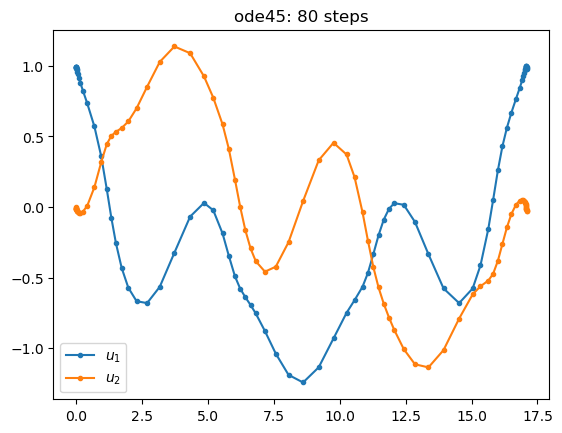

In [3]:
############################################################
y0 = [0.994, 0, 0, -2.00158510637908252240537862224]

a, b = 0, 17.1

############################################################
tt, yy = ode45(f, y0, [a, b], reltol=1e-4, abstol=1e-4)

N = length(tt) - 1

yy = hcat(yy...)

u1 = yy[1,:]
u2 = yy[3,:]

############################################################
plot(tt, u1, ".-", label=L"u_1")
plot(tt, u2, ".-", label=L"u_2")
axis("tight")
legend(loc="best")
title("ode45: $N steps");

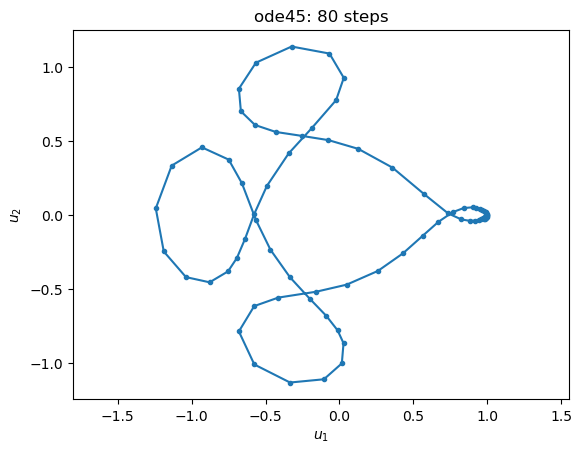

In [4]:
plot(u1, u2, ".-")
xlabel(L"u_1")
ylabel(L"u_2")
axis("equal")
title("ode45: $N steps");

---

## Exercise

Determine the number of steps required to obtain a qualitatively correct figure using `rk4`.

In [5]:
function rk4(f, a, b, y0, N)
    
    h = (b - a)/N

    tt = range(a, b, length=N+1)
    yy = [y0]

    for i = 1:N
        K1 = f(tt[i], yy[i])
        K2 = f(tt[i] + h/2, yy[i] + h/2*K1)
        K3 = f(tt[i] + h/2, yy[i] + h/2*K2)
        K4 = f(tt[i] + h, yy[i] + h*K3)
        ynew = yy[i] + h*(K1 + 2K2 + 2K3 + K4)/6
        push!(yy, ynew)
    end
    
    return tt, yy
end

rk4 (generic function with 1 method)

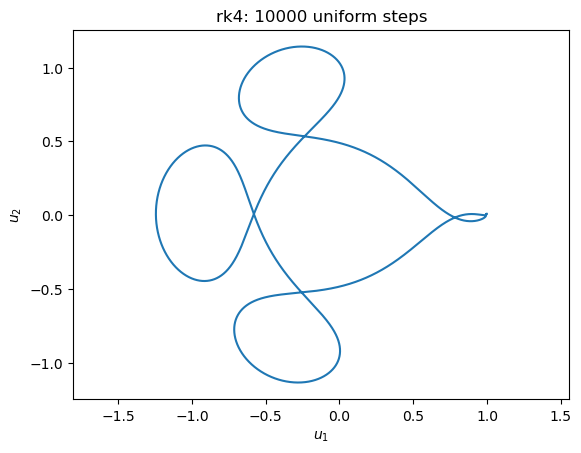

In [13]:
N = 10000

tt, yy = rk4(f, a, b, y0, N)

yy = hcat(yy...)

u1 = yy[1,:]
u2 = yy[3,:]

plot(u1, u2, "-")
xlabel(L"u_1")
ylabel(L"u_2")
axis("equal")
title("rk4: $N uniform steps");

---